# Using a Decision Tree to predict Titanic survivors 🚢

In [674]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [675]:
# Load the dataset
df = pd.read_csv('./train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [676]:
# show head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Primeiro tratamento nos dados

Removendo valores sem informação estatística

In [677]:
# Remove name column
df_1st_test = df.drop(columns=['Name'], inplace=False)
df_1st_test.head()

# Remove ticket column (Acho que não é útil mas tem que ver)
df_1st_test = df_1st_test.drop(columns=['Ticket'], inplace=False)
df_1st_test.head()

# Remove id column
df_1st_test = df_1st_test.drop(columns=['PassengerId'], inplace=False)
df_1st_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Transformando valores de gênero, nº da cabine e porto de embarque em valores numéricos

In [678]:
# Turn sex into number
gender_mapping = {'male': '0.0', 'female': '1.0'}
df_1st_test['Sex'] = df_1st_test['Sex'].map(gender_mapping)

# Turn Cabin into number
def convert_cabin(cabin):
    # If cabin is not NaN and has at least one character
    if pd.notna(cabin) and len(cabin) > 0:
        # Get ASCII value of the letter
        ascii_val = ord(cabin[0])
        # Extract numeric portion (if exists)
        num = ''.join(filter(str.isdigit, cabin))
        # Return concatenated value
        return str(ascii_val) + num
    return cabin

# Apply the function to the 'Cabin' column
df_1st_test['Cabin'] = df_1st_test['Cabin'].apply(convert_cabin).astype(float)

# Turn Embarked into number
gender_mapping = {'S': '0.0', 'C': '1.0', 'Q': '2.0',}
df_1st_test['Embarked'] = df_1st_test['Embarked'].map(gender_mapping)


df_1st_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0.0,22.0,1,0,7.2500,NaN,0.0
1,1,1,1.0,38.0,1,0,71.2833,6785.0,1.0
2,1,3,1.0,26.0,0,0,7.9250,NaN,0.0
3,1,1,1.0,35.0,1,0,53.1000,67123.0,0.0
4,0,3,0.0,35.0,0,0,8.0500,NaN,0.0


Realizando remioção de linhas com NaN

In [679]:
print (df_1st_test.isnull().sum())

df_1st_test = df_1st_test.dropna()

print(df_1st_test.shape)

df_1st_test.head()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
(183, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,1.0,38.0,1,0,71.2833,6785.0,1.0
3,1,1,1.0,35.0,1,0,53.1000,67123.0,0.0
6,0,1,0.0,54.0,0,0,51.8625,6946.0,0.0
10,1,3,1.0,4.0,1,1,16.7000,716.0,0.0
11,1,1,1.0,58.0,0,0,26.5500,67103.0,0.0


In [680]:
# Separate  train and test
x = df_1st_test.drop(columns=['Survived'], inplace=False)
y = df_1st_test['Survived']

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [681]:
# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7636363636363637


A remoção de NaN tirou muitas linhas do dataset, ocasionando em perda de dados e deterioração da qualidade do modelo

## Testando remover cabine

In [682]:
#Remove cabin column
df_2nd_test = df.drop(columns=['Cabin'], inplace=False)

# Remove name column
df_2nd_test = df_2nd_test.drop(columns=['Name'], inplace=False)

# Remove ticket column (Acho que não é útil mas tem que ver)
df_2nd_test = df_2nd_test.drop(columns=['Ticket'], inplace=False)

# Remove id column
df_2nd_test = df_2nd_test.drop(columns=['PassengerId'], inplace=False)

df_2nd_test['Age'].fillna(int(np.mean(df_2nd_test['Age'])), inplace=True)

df_2nd_test = df_2nd_test.dropna()

# Turn sex into number
gender_mapping = {'male': '0.0', 'female': '1.0'}
df_2nd_test['Sex'] = df_2nd_test['Sex'].map(gender_mapping)

# Turn Embarked into number
embarked_mapping = {'S': '0.0', 'C': '1.0', 'Q': '2.0',}
df_2nd_test['Embarked'] = df_2nd_test['Embarked'].map(embarked_mapping)

df_2nd_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,0.0
1,1,1,1.0,38.0,1,0,71.2833,1.0
2,1,3,1.0,26.0,0,0,7.9250,0.0
3,1,1,1.0,35.0,1,0,53.1000,0.0
4,0,3,0.0,35.0,0,0,8.0500,0.0


Garantindo que não há nenhum NaN no dataframe:

In [683]:
df_2nd_test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [684]:
# Separate  train and test
x = df_2nd_test.drop(columns=['Survived'], inplace=False)
y = df_2nd_test['Survived']

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.797752808988764


## Último tratamento nos dados

In [685]:
# Load the dataset
df = pd.read_csv('./train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [686]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [687]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [688]:
def printRateSurviveByColumn(column):
  print(df[[column, 'Survived']].groupby(column).mean().sort_values(by='Survived', ascending=False))

In [689]:
for column in df.columns:
    if df[column].nunique() < 5 and column != 'Survived':
        print(f"Survival Rate by {column}:")
        printRateSurviveByColumn(column)
        print()

Survival Rate by Pclass:
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

Survival Rate by Sex:
        Survived
Sex             
female  0.742038
male    0.188908

Survival Rate by Embarked:
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957



In [690]:
df_3rd_test = pd.read_csv('./train.csv')

In [691]:
# Remove id column
df_3rd_test = df_3rd_test.drop(columns=['PassengerId'], inplace=False)

#Remove cabin column
df_3rd_test = df_3rd_test.drop(columns=['Cabin'], inplace=False)

# Remove ticket column (Acho que não é útil mas tem que ver)
df_3rd_test = df_3rd_test.drop(columns=['Ticket'], inplace=False)

df_3rd_test['Age'].fillna(int(np.mean(df_3rd_test['Age'])), inplace=True)

df_3rd_test = df_3rd_test.dropna()

df_3rd_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [692]:
df_3rd_test['Title'] = df_3rd_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_3rd_test = df_3rd_test.drop(columns=['Name'], inplace=False)

In [693]:
def replace_titles(title, gender, df):
    if title in ['Mr', 'Miss'] or df['Title'].value_counts()[title] >= 5:
        return title
    elif gender == 'male':
        return 'Mr'
    elif gender == 'female':
        return 'Miss'

# Aplicar a substituição com base no gênero
df_3rd_test['Title'] = df_3rd_test.apply(lambda row: replace_titles(row['Title'], row['Sex'], df_3rd_test), axis=1)

# Verificar a contagem dos títulos após a substituição
df_3rd_test['Title'].value_counts()

Mr        525
Miss      187
Mrs       124
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

In [694]:
colunas_categoricas = df_3rd_test.select_dtypes(include=['object', 'category']).columns

df_3rd_test = pd.get_dummies(df_3rd_test, columns=colunas_categoricas)

In [695]:
# Separate  train and test
x = df_3rd_test.drop(columns=['Survived'], inplace=False)
y = df_3rd_test['Survived']

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [696]:
# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7677902621722846


## Variando os parâmetros da árvore de decisão

In [697]:
def plot_scores(labels, scores, str):
  color_palette = sns.color_palette("cool", len(labels))

  sns.barplot(x=labels, y=scores, palette=color_palette)
  plt.xlabel(str)
  plt.ylabel("Score")
  plt.title(f"{str} X Score")
  plt.ylim(min(scores) - 0.05, min(max(scores) + 0.05, 1))
  plt.xticks(rotation=45)
  plt.show()

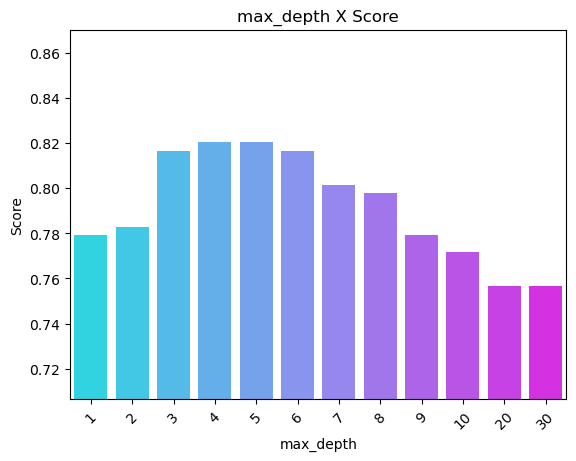

In [698]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]
scores = []

for depth in max_depths:
  clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
  clf.fit(x_train, y_train)
  scores.append(clf.score(x_test, y_test))

plot_scores(max_depths, scores, "max_depth")

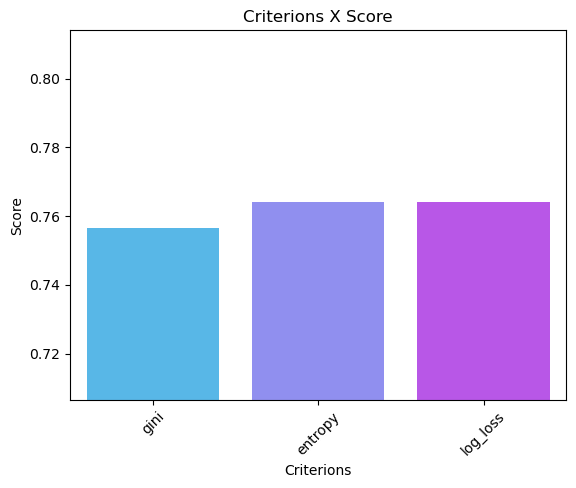

In [699]:
criterions = ['gini', 'entropy', 'log_loss']
scores = []

for criterion in criterions:
  clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
  clf.fit(x_train, y_train)
  scores.append(clf.score(x_test, y_test))

plot_scores(criterions, scores, "Criterions")

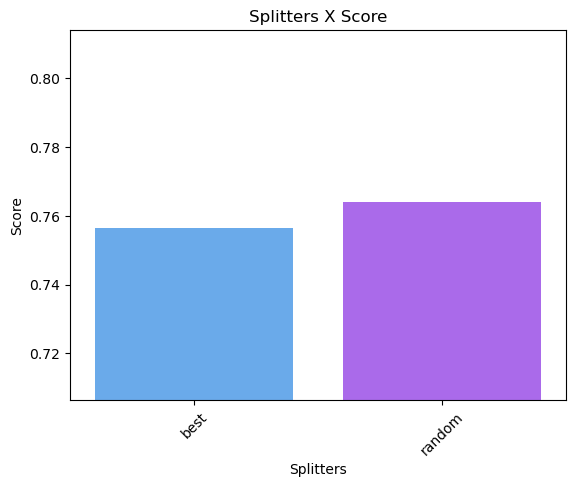

In [700]:
splitters = ['best', 'random']
scores = []

for splitter in splitters:
  clf = DecisionTreeClassifier(splitter=splitter, random_state=42)
  clf.fit(x_train, y_train)
  scores.append(clf.score(x_test, y_test))

plot_scores(splitters, scores, "Splitters")

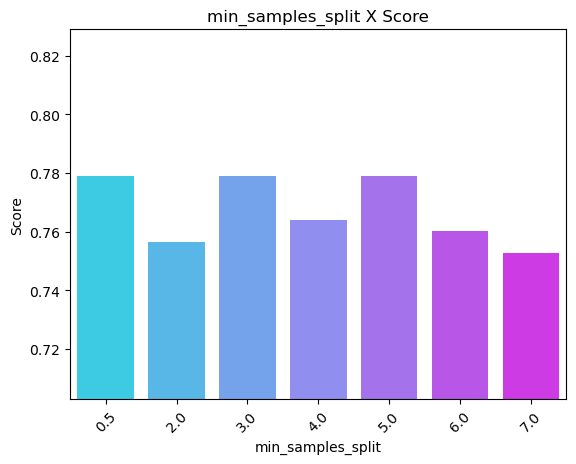

In [701]:
min_samples_split = [0.5,2,3,4,5,6,7]
scores = []

for min_sample in min_samples_split:
  clf = DecisionTreeClassifier(min_samples_split=min_sample, random_state=42)
  clf.fit(x_train, y_train)
  scores.append(clf.score(x_test, y_test))

plot_scores(min_samples_split, scores, "min_samples_split")

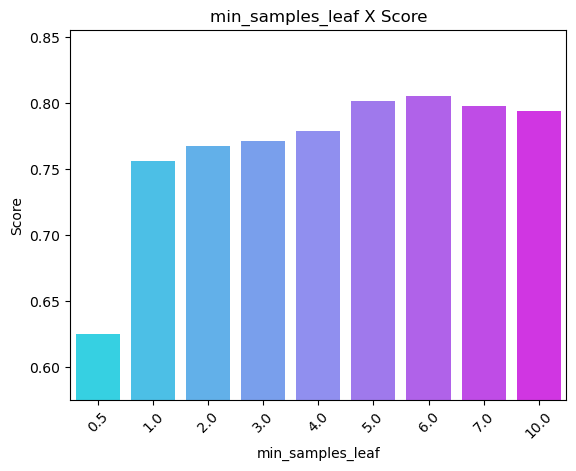

In [702]:
min_samples_leaf = [0.5,1,2,3,4,5,6,7,10]
scores = []

for min_sample in min_samples_leaf:
  clf = DecisionTreeClassifier(min_samples_leaf=min_sample, random_state=42)
  clf.fit(x_train, y_train)
  scores.append(clf.score(x_test, y_test))

plot_scores(min_samples_leaf, scores, "min_samples_leaf")

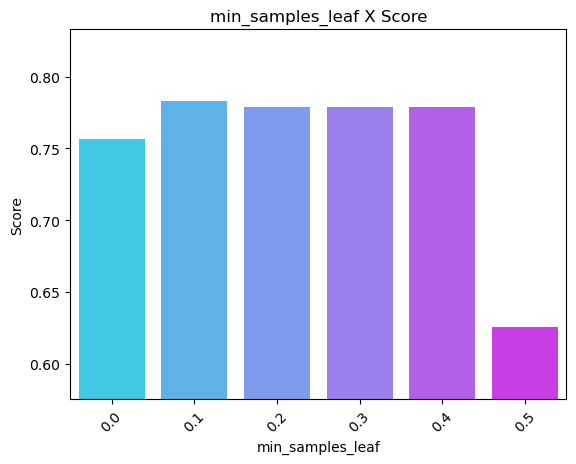

In [703]:
min_weight_fraction_leaf = [0.0,0.1,0.2,0.3,0.4,0.5]
scores = []

for min_weight in min_weight_fraction_leaf:
  clf = DecisionTreeClassifier(min_weight_fraction_leaf=min_weight, random_state=42)
  clf.fit(x_train, y_train)
  scores.append(clf.score(x_test, y_test))

plot_scores(min_weight_fraction_leaf, scores, "min_samples_leaf")

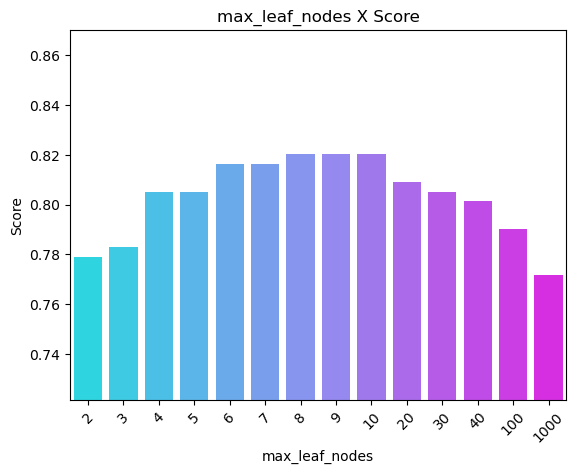

In [704]:
max_leaf_nodes = [2,3,4,5,6,7,8,9,10,20,30,40,100,1000]
scores = []

for max_leaf_node in max_leaf_nodes:
  clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_node, random_state=42)
  clf.fit(x_train, y_train)
  scores.append(clf.score(x_test, y_test))

plot_scores(max_leaf_nodes, scores, "max_leaf_nodes")

In [705]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=8, random_state=42)
# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8052434456928839
